In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from scipy import stats

## Create Dataframe of warehouse locations
### Scrape warehouse location data from selleressentials.com

In [2]:
page = requests.get('https://selleressentials.com/amazon/amazon-fulfillment-center-locations/') # Make a get request to retrieve the page
soup = BeautifulSoup(page.content, 'html.parser') # Pass the page contents to beautiful soup for parsing
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>

<html class="avada-html-layout-wide avada-html-header-position-top avada-has-site-width-percent avada-has-page-background-pattern" lang="en-US" prefix="og: http://ogp.me/ns#">
<head>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Amazon Fulfillment Center Locations - Seller Essentials</title>
<!-- This site is optimized with the Yoast SEO Premium plugin v7.2 - https://yoast.com/wordpress/plugins/seo/ -->
<meta content="Zoom in on this map of Amazon Fulfillment Center Locations around the world by Seller Essentials. Sort the columns by Location Code, Address, Type of warehouse, and more. Find out which Amazon Fulfillment Centers offer guided tours." name="description"/>
<link href="https://selleressentials.com/amazon/amazon-fulfillment-center-locations/" rel="canonical"/>
<meta content="en

### Retrieve data from one tag

In [73]:
tag = soup.find('tr', class_=f"ninja_table_row_{0} nt_row_id_{53}")
tag

<tr class="ninja_table_row_0 nt_row_id_53" data-row_id="53">
<td>Arizona</td><td>PHX3</td><td>FC</td><td>6835 W. Buckeye Rd. Phoenix, AZ, 85043</td> </tr>

In [56]:
sub = tag.find_all('td')
sub

[<td>Arizona</td>,
 <td>PHX3</td>,
 <td>FC</td>,
 <td>6835 W. Buckeye Rd. Phoenix, AZ, 85043</td>]

In [5]:
item = [i.string for i in sub]
item

['Arizona', 'PHX3', 'FC', '6835 W. Buckeye Rd. Phoenix, AZ, 85043']

In [6]:
address = item[-1].split(' ')
address

['6835', 'W.', 'Buckeye', 'Rd.', 'Phoenix,', 'AZ,', '85043']

In [16]:
# city = address[0].split()[-1]
# city

'Phoenix'

In [7]:
state = address[-2][:2]
state

'AZ'

In [7]:
# pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
from geopy.geocoders import Nominatim

In [3]:
geolocator = Nominatim(user_agent="project") #have to specify an app name

In [10]:
location = geolocator.geocode(item[-1])

In [11]:
coordinates = (location.latitude, location.longitude)
coordinates

(33.43332425, -112.20779650534851)

In [13]:
row = {'code': item[1], 'type': item[2], 'coord': coordinates, 'state': state, 'zip': address[-1][:5].strip()}
row

{'code': 'PHX3',
 'type': 'FC',
 'coord': (33.43332425, -112.20779650534851),
 'state': 'AZ',
 'zip': '85043'}

### Retrieve data from all tags

In [65]:
# the source data table was very messy with intermittent advertisements, non-sequential numbering, and variant address formatting
# the below function loops through the table, retrieving all possible records in 'records' 
# and storing tags that returned an error in 'manual' for further cleaning

def scrape_records(index1, index2): #lists of index positions from <tr> tags
    indices = list(zip(index1,index2))

    records=[]
    manual=[]
    for i,j in indices:
        tag = soup.find('tr', class_=f"ninja_table_row_{i} nt_row_id_{j}") 
        sub = tag.find_all('td')
        try:
            item = sub[-1].string.strip()
            location = geolocator.geocode(item)
            coordinates = (location.latitude, location.longitude)
        except:
            manual.append(f"ninja_table_row_{i} nt_row_id_{j}")
            continue

        row = {'coord': coordinates}
        records.append(row)
        
    return records, manual

In [66]:
# Arizona 
az_index1 = list(range(6))
az_index2 = list(range(53,59))
az_records, az_manual = scrape_records(az_index1, az_index2)

In [67]:
az_records, az_manual

([{'coord': (33.43332425, -112.20779650534851)},
  {'coord': (33.4121962, -112.4219375681358)},
  {'coord': (33.43119215503821, -112.15656929556613)},
  {'coord': (33.4485194, -112.2211793)},
  {'coord': (33.431179952419065, -112.15949317869877)},
  {'coord': (33.441741658291456, -112.22957998492463)}],
 [])

In [68]:

# California 
ca_index1 = list(range(7,29)) 
ca_index2 = [60,61,62,64,65,66,67,68,69,70,71,72,73,74,75,76,261,262,263,77,78,79]
ca_records, ca_manual = scrape_records(ca_index1, ca_index2)

In [69]:
ca_records, ca_manual

([{'coord': (34.12841087755102, -117.42259173469388)},
  {'coord': (34.079646, -117.27532067336683)},
  {'coord': (37.7348257, -121.5314846)},
  {'coord': (34.0775633, -117.2330161)},
  {'coord': (37.4700601, -121.164331)},
  {'coord': (37.7430048, -121.4047365)},
  {'coord': (37.52274876484464, -122.0143879172679)},
  {'coord': (37.9166607, -121.25040435)},
  {'coord': (34.0814685, -117.201434)},
  {'coord': (33.8813784, -117.2944786)},
  {'coord': (34.079646, -117.27532067336683)},
  {'coord': (34.079646, -117.27532067336683)},
  {'coord': (37.52274876484464, -122.0143879172679)},
  {'coord': (33.86658169789471, -117.23708735289637)},
  {'coord': (34.127027585582134, -117.40116311524525)}],
 ['ninja_table_row_8 nt_row_id_61',
  'ninja_table_row_10 nt_row_id_64',
  'ninja_table_row_12 nt_row_id_66',
  'ninja_table_row_13 nt_row_id_67',
  'ninja_table_row_19 nt_row_id_73',
  'ninja_table_row_22 nt_row_id_76',
  'ninja_table_row_25 nt_row_id_263'])

In [71]:
#Colorado,Conneticut
cc_index1 = list(range(36,42))
cc_index2 = list(range(80,86)) + [239]
cc_records, cc_manual = scrape_records(cc_index1, cc_index2)

In [72]:
cc_records, cc_manual

([{'coord': (39.76768665, -104.7557950513125)},
  {'coord': (39.743461514279375, -104.71318452955254)},
  {'coord': (39.794520500000004, -104.98104795)},
  {'coord': (41.876107, -72.694975)},
  {'coord': (41.4868071, -72.7630022)},
  {'coord': (41.40718813037837, -72.84521501106487)}],
 [])

In [76]:
#Delaware
de_index1 = list(range(43,47))
de_index2 = list(range(86,90))
de_records, de_manual = scrape_records(de_index1, de_index2)

In [77]:
de_records, de_manual

([{'coord': (39.662698, -75.588325)},
  {'coord': (39.66211066347132, -75.58776128275659)},
  {'coord': (39.4434528, -75.7390241)},
  {'coord': (39.4559445, -75.7187088)}],
 [])

In [78]:
#Florida-Indiana
fi_index1 = list(range(50,82))
fi_index2 = list(range(90,119)) + [264,265,119]
fi_records, fi_manual = scrape_records(fi_index1, fi_index2)

In [79]:
fi_records, fi_manual

([{'coord': (27.724197443460195, -82.39275260266557)},
  {'coord': (28.020405465339724, -82.05553738019398)},
  {'coord': (28.020405465339724, -82.05553738019398)},
  {'coord': (30.465323599999998, -81.68029390000001)},
  {'coord': (30.3821120009228, -81.78788431182106)},
  {'coord': (33.7962248, -84.640658)},
  {'coord': (33.568814829853416, -84.53943522521547)},
  {'coord': (34.10540731891049, -83.77667531855853)},
  {'coord': (41.4808934, -88.0759124)},
  {'coord': (41.4855423, -88.0694809)},
  {'coord': (41.67406883333334, -88.11770666666666)},
  {'coord': (38.77187085, -90.04064684767636)},
  {'coord': (38.7973679, -90.0763783)},
  {'coord': (38.7973679, -90.0763783)},
  {'coord': (41.42675514657619, -87.77108285445104)},
  {'coord': (41.815004349999995, -88.21276520465292)},
  {'coord': (39.70837085714286, -86.34626871428571)},
  {'coord': (39.70838540816327, -86.34626895918367)},
  {'coord': (39.75455704597701, -86.28910116091954)},
  {'coord': (38.37880535, -85.6868243)}],
 ['n

In [80]:
#Kansas-Michigan
km_index1 = list(range(83,109))
km_index2 = [266] + list(range(120,145))
km_records, km_manual = scrape_records(km_index1, km_index2)

In [81]:
km_records, km_manual

([{'coord': (38.92240213439838, -94.78181316565949)},
  {'coord': (39.102365, -94.73927226530611)},
  {'coord': (37.32801126608095, -85.35168765525495)},
  {'coord': (38.1951343, -85.69271712333497)},
  {'coord': (39.0846526, -84.71347803083603)},
  {'coord': (39.0849526, -84.7149241)},
  {'coord': (39.0600057171595, -84.71357387388001)},
  {'coord': (38.0778404, -84.5331091)},
  {'coord': (38.07406747086827, -84.54651541547122)},
  {'coord': (37.978102, -85.683543)},
  {'coord': (37.9638046, -85.6758038)},
  {'coord': (39.267657549999996, -76.54904529607478)},
  {'coord': (39.271657, -76.552755)},
  {'coord': (39.27036459999999, -76.54803544883359)},
  {'coord': (39.5897876, -76.0047591)},
  {'coord': (41.7621205, -71.100137874562)},
  {'coord': (42.37434320175948, -83.42885569671779)},
  {'coord': (42.37434320175948, -83.42885569671779)}],
 ['ninja_table_row_83 nt_row_id_266',
  'ninja_table_row_84 nt_row_id_120',
  'ninja_table_row_87 nt_row_id_123',
  'ninja_table_row_93 nt_row_id_

In [82]:
#Minnesota-New Jersey
mn_index1 = [111,112] + list(range(114,120)) + list(range(121,135))
mn_index2 = [145,146] + list(range(147,153)) + list(range(153,167))
mn_records, mn_manual = scrape_records(mn_index1, mn_index2)

In [83]:
mn_records, mn_manual

([{'coord': (44.80059945, -93.48865500885567)},
  {'coord': (44.78839255, -93.44285005008032)},
  {'coord': (39.600859615371554, -119.84574717831151)},
  {'coord': (42.7919779, -71.5294631)},
  {'coord': (40.56934732377457, -74.22058659986419)},
  {'coord': (40.56934732377457, -74.22058659986419)},
  {'coord': (40.096959, -74.792309)},
  {'coord': (40.86323053367198, -74.0603383184325)}],
 ['ninja_table_row_115 nt_row_id_148',
  'ninja_table_row_116 nt_row_id_149',
  'ninja_table_row_117 nt_row_id_150',
  'ninja_table_row_118 nt_row_id_151',
  'ninja_table_row_121 nt_row_id_153',
  'ninja_table_row_122 nt_row_id_154',
  'ninja_table_row_123 nt_row_id_155',
  'ninja_table_row_124 nt_row_id_156',
  'ninja_table_row_125 nt_row_id_157',
  'ninja_table_row_126 nt_row_id_158',
  'ninja_table_row_129 nt_row_id_161',
  'ninja_table_row_130 nt_row_id_162',
  'ninja_table_row_131 nt_row_id_163',
  'ninja_table_row_132 nt_row_id_164'])

In [84]:
#New York-Texas
nt_index1 = [136,138,139,140,141,143,144,145,149] + list(range(154,195))
nt_index2 = list(range(167,217))
nt_records, nt_manual = scrape_records(nt_index1, nt_index2)

In [85]:
nt_records, nt_manual

([{'coord': (42.923611, -78.622055)},
  {'coord': (35.389794251124016, -80.71889678215366)},
  {'coord': (35.389794251124016, -80.71889678215366)},
  {'coord': (35.24221934771131, -80.99737261815821)},
  {'coord': (41.30542925, -81.4657302754815)},
  {'coord': (39.95681116305533, -82.71457050974392)},
  {'coord': (39.843697, -82.933829)},
  {'coord': (45.55850289999999, -122.91967872516132)},
  {'coord': (40.923723332947645, -76.08056768674362)},
  {'coord': (40.3750622, -76.6446661)},
  {'coord': (40.1886535, -77.2401812)},
  {'coord': (40.44260879509591, -80.08352276997047)},
  {'coord': (40.18896193584097, -77.23878476055881)},
  {'coord': (40.44260879509591, -80.08352276997047)},
  {'coord': (35.00827065, -82.03562155725744)},
  {'coord': (36.13339792612313, -86.40711361516522)},
  {'coord': (36.1274658, -86.4050146)},
  {'coord': (35.7800275, -86.3614113)},
  {'coord': (36.128425, -86.693565)},
  {'coord': (35.0708247, -85.1433617)},
  {'coord': (32.95804715, -97.01703732496823)},

In [87]:
#Virginia-Wisconsin
vw_index1 = list(range(198,214))
vw_index2 = [217,218,219,268] + list(range(220,232))
vw_records, vw_manual = scrape_records(vw_index1, vw_index2)

In [88]:
vw_records, vw_manual

([{'coord': (37.19469625, -77.49304279260181)},
  {'coord': (47.62070071812081, -122.17512845637584)},
  {'coord': (47.24100835, -122.24329237781214)},
  {'coord': (47.41449595, -122.25778195000001)},
  {'coord': (42.6037382, -87.9101178)},
  {'coord': (42.606909849999994, -87.94814344844625)}],
 ['ninja_table_row_199 nt_row_id_218',
  'ninja_table_row_200 nt_row_id_219',
  'ninja_table_row_201 nt_row_id_268',
  'ninja_table_row_202 nt_row_id_220',
  'ninja_table_row_203 nt_row_id_221',
  'ninja_table_row_204 nt_row_id_222',
  'ninja_table_row_205 nt_row_id_223',
  'ninja_table_row_206 nt_row_id_224',
  'ninja_table_row_207 nt_row_id_225',
  'ninja_table_row_208 nt_row_id_226'])

In [114]:
#Create aggregate list of the tags that returned an error
manual = ca_manual + fi_manual + km_manual + mn_manual + nt_manual + vw_manual
len(manual)
manual

['ninja_table_row_8 nt_row_id_61',
 'ninja_table_row_10 nt_row_id_64',
 'ninja_table_row_12 nt_row_id_66',
 'ninja_table_row_13 nt_row_id_67',
 'ninja_table_row_19 nt_row_id_73',
 'ninja_table_row_22 nt_row_id_76',
 'ninja_table_row_25 nt_row_id_263',
 'ninja_table_row_53 nt_row_id_93',
 'ninja_table_row_54 nt_row_id_94',
 'ninja_table_row_56 nt_row_id_96',
 'ninja_table_row_58 nt_row_id_98',
 'ninja_table_row_62 nt_row_id_102',
 'ninja_table_row_70 nt_row_id_110',
 'ninja_table_row_72 nt_row_id_112',
 'ninja_table_row_73 nt_row_id_113',
 'ninja_table_row_74 nt_row_id_114',
 'ninja_table_row_78 nt_row_id_118',
 'ninja_table_row_79 nt_row_id_264',
 'ninja_table_row_80 nt_row_id_265',
 'ninja_table_row_83 nt_row_id_266',
 'ninja_table_row_84 nt_row_id_120',
 'ninja_table_row_87 nt_row_id_123',
 'ninja_table_row_93 nt_row_id_129',
 'ninja_table_row_96 nt_row_id_132',
 'ninja_table_row_99 nt_row_id_135',
 'ninja_table_row_104 nt_row_id_140',
 'ninja_table_row_106 nt_row_id_142',
 'ninja_ta

In [107]:
# check formatting issues
t=soup.find('tr', class_=manual[2])

In [116]:
t.find_all('td')[-1].get_text()

'2020 E Central Avenue, Southgate Building 4, San Bernardino, CA 92408-2606\t'

In [126]:
# get addresses from tags and fix formatting
my_list=[]
for i,element in enumerate(manual):
    _ = soup.find('tr', class_=manual[i])
    raw_address = _.find_all('td')[-1].get_text().strip()
    if raw_address.endswith('\t'):
        raw_address = raw_address.split('\t')[0]
        
    my_list.append(raw_address)
    

In [138]:
addy = ' '.join(my_list[0].split(' ')[:-1])
addy = addy + ' 91752'

In [215]:
# geopy still won't work on these tags, so using pygeocoder
type(geolocator.geocode('5250 Goodman Road, Eastvale, CA 92880'))


NoneType

In [127]:
my_list #address that still need to be converted to coordinates

['5250 Goodman Road, Eastvale, CA 92880',
 '5250 Goodman Road, Eastvale, CA 92880',
 '2020 E Central Avenue, Southgate Building 4, San Bernardino, CA 92408-2606',
 '24208 San Michele, Moreno Valley, CA 92551',
 '4590 Goodman Way, Building 1, Eastvale, CA 91752-5088',
 '4900 W Elkhorn Blvd, Metro Air Park, Sacramento, CA 95835-9505',
 'E Central Avenue, Southgate Building 3, San Bernardino, CA 92408-0123',
 '1900 NW 132nd Place, Doral, FL, 33182',
 '205 Deen Still Road, Davenport, FL 33897',
 '13333 103rd St. Cecil Commerce Center, Jacksonville, FL 32221-8686',
 '4200 North Commerce, Atlanta, GA 30344-5707',
 '808 Hog Mountain Rd., Building F, Jefferson, GA, 30549',
 '1750 Bridge Dr., Waukegan, IL 60085-3004',
 '1125 W Remington Blvd, Romeoville, IL 60556',
 '5100 S Indianapolis Road, Whitestown, IN 46075',
 '4255 Anson Boulevard, Whitestown, IN 46075',
 '800 S Perry Road, Plainfield, IN 46168',
 '1453 10th Street, Jeffersonville, IN 47130',
 '9101 Orly Dr, Indianapolis, IN 46241',
 '11

In [145]:
pip install pygeocoder

  Created wheel for pygeocoder: filename=pygeocoder-1.2.5-cp36-none-any.whl size=8890 sha256=20292a16c8e81003647d893ae0f32a25ccbfb6a20f9b52e082392a550f0bf43e
  Stored in directory: C:\Users\achil\AppData\Local\pip\Cache\wheels\7c\4c\00\d05c66c4af5411c554c91b8079732c8a0359c2226fb8c01031
Successfully built pygeocoder
Note: you may need to restart the kernel to use updated packages.


In [146]:
from pygeocoder import Geocoder

In [152]:
geocoder = Geocoder(api_key='API key')

In [153]:
#testing to see that it works
geocoder.geocode("4207 N Washington Ave, Douglas, AZ 85607").valid_address

True

In [155]:
#test
result = geocoder.geocode(my_list[0])
result.coordinates

(33.9934733, -117.553896)

In [157]:
#create list of coordinates from list of addresses
coordinates=[]
for i in range(len(my_list)):
    result = geocoder.geocode(my_list[i])
    coord = result.coordinates
    coordinates.append(coord)

In [158]:
coordinates

[(33.9934733, -117.553896),
 (33.9934733, -117.553896),
 (34.0900734, -117.2415235),
 (33.8720124, -117.2380732),
 (33.9991319, -117.5546178),
 (38.6825113, -121.5743353),
 (34.0884084, -117.2458387),
 (25.792998, -80.4108667),
 (28.2536146, -81.6601312),
 (30.2485587, -81.8635874),
 (33.6435231, -84.5002226),
 (34.1596709, -83.63075769999999),
 (42.3288517, -87.9019375),
 (41.6720569, -88.1155193),
 (39.9656696, -86.38296270000001),
 (39.9814183, -86.3765514),
 (39.6964498, -86.3578005),
 (38.2895656, -85.7304796),
 (39.6747924, -86.3259504),
 (38.9225117, -94.77934789999999),
 (38.772169, -94.94547899999999),
 (37.1045989, -95.5858513),
 (39.0747524, -84.7182751),
 (37.9822049, -85.68393619999999),
 (37.9829008, -85.6872629),
 (42.1469106, -71.06309),
 (42.162177, -83.23751700000001),
 (36.2287803, -115.1055348),
 (36.2668804, -115.0744003),
 (39.610373, -119.212531),
 (39.6037491, -119.8486126),
 (39.7753707, -75.37783449999999),
 (40.1956238, -74.5651555),
 (40.5827884, -74.2557139

In [159]:
# aggregate coordinates from geopy
records = az_records + ca_records + cc_records + de_records + fi_records + km_records + mn_records + nt_records + vw_records

In [160]:
records

[{'coord': (33.43332425, -112.20779650534851)},
 {'coord': (33.4121962, -112.4219375681358)},
 {'coord': (33.43119215503821, -112.15656929556613)},
 {'coord': (33.4485194, -112.2211793)},
 {'coord': (33.431179952419065, -112.15949317869877)},
 {'coord': (33.441741658291456, -112.22957998492463)},
 {'coord': (34.12841087755102, -117.42259173469388)},
 {'coord': (34.079646, -117.27532067336683)},
 {'coord': (37.7348257, -121.5314846)},
 {'coord': (34.0775633, -117.2330161)},
 {'coord': (37.4700601, -121.164331)},
 {'coord': (37.7430048, -121.4047365)},
 {'coord': (37.52274876484464, -122.0143879172679)},
 {'coord': (37.9166607, -121.25040435)},
 {'coord': (34.0814685, -117.201434)},
 {'coord': (33.8813784, -117.2944786)},
 {'coord': (34.079646, -117.27532067336683)},
 {'coord': (34.079646, -117.27532067336683)},
 {'coord': (37.52274876484464, -122.0143879172679)},
 {'coord': (33.86658169789471, -117.23708735289637)},
 {'coord': (34.127027585582134, -117.40116311524525)},
 {'coord': (39.7

### Merge coordinates from both processes to create df

In [169]:
latitude1 = []
longitude1 = []
for record in records:
    lat = record['coord'][0]
    long = record['coord'][1]
    latitude1.append(lat)
    longitude1.append(long)

In [170]:
display(len(latitude1))
display(len(longitude1))

114

114

In [171]:
latitude2 = []
longitude2 = []
for coord in coordinates:
    lat2 = coord[0]
    long2 = coord[1]
    latitude2.append(lat2)
    longitude2.append(long2)

In [172]:
display(len(latitude2))
display(len(longitude2))

70

70

In [173]:
latitude = latitude1 + latitude2
len(latitude)

184

In [174]:
longitude = longitude1 + longitude2
len(longitude)

184

In [175]:
warehouse_locations = {'aw_lat': latitude, 'aw_long': longitude}

In [212]:
df = pd.DataFrame(warehouse_locations)
df.head()

,aw_lat,aw_long
0,33.433324,-112.207797
1,33.412196,-112.421938
2,33.431192,-112.156569
3,33.448519,-112.221179
4,33.431180,-112.159493


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
aw_lat     184 non-null float64
aw_long    184 non-null float64
dtypes: float64(2)
memory usage: 3.0 KB


In [209]:
aw_cities=[]
aw_states=[]
aw_zips=[]
for x in range(len(df['aw_lat'])):
    row = geocoder.reverse_geocode(df['aw_lat'][x], df['aw_long'][x])
    c = row.city
    state = row.administrative_area_level_1
    zip_code = row.postal_code
    
    aw_cities.append(c)
    aw_states.append(state)
    aw_zips.append(zip_code)

In [210]:
display(len(aw_cities))
display(len(aw_states))
display(len(aw_zips))

184

184

184

In [213]:
df['aw_city'] = aw_cities
df['aw_state'] = aw_states
df['aw_zip'] = aw_zips
df.head()

,aw_lat,aw_long,aw_city,aw_state,aw_zip
0,33.433324,-112.207797,Phoenix,Arizona,85043
1,33.412196,-112.421938,Goodyear,Arizona,85338
2,33.431192,-112.156569,Phoenix,Arizona,85043
3,33.448519,-112.221179,Phoenix,Arizona,85043
4,33.431180,-112.159493,Phoenix,Arizona,85043


In [214]:
# df.to_csv('amazon_warehouses.csv')

## Feature engineering and EDA

In [8]:
df = pd.read_csv('amazon_warehouses.csv', index_col=0)
df.head()

,aw_lat,aw_long,aw_city,aw_state,aw_zip
0,33.433324,-112.207797,Phoenix,Arizona,85043
1,33.412196,-112.421938,Goodyear,Arizona,85338
2,33.431192,-112.156569,Phoenix,Arizona,85043
3,33.448519,-112.221179,Phoenix,Arizona,85043
4,33.431180,-112.159493,Phoenix,Arizona,85043


In [9]:
from geopy import distance

In [10]:
loc1 = (df['aw_lat'][0], df['aw_long'][0])
loc2 = (df['aw_lat'][1], df['aw_long'][1])

In [11]:
print(distance.distance(loc1, loc2).miles)

12.460710239593315


In [12]:
df['aw_coord'] = df.apply(lambda row: (round(row.aw_lat,2), round(row.aw_long,2)), axis=1)

In [37]:
df.head()

,aw_lat,aw_long,aw_city,aw_state,aw_zip,aw_coord,aw_zip_str
0,33.433324,-112.207797,Phoenix,Arizona,85043,"(33.43, -112.21)",85043
1,33.412196,-112.421938,Goodyear,Arizona,85338,"(33.41, -112.42)",85338
2,33.431192,-112.156569,Phoenix,Arizona,85043,"(33.43, -112.16)",85043
3,33.448519,-112.221179,Phoenix,Arizona,85043,"(33.45, -112.22)",85043
4,33.431180,-112.159493,Phoenix,Arizona,85043,"(33.43, -112.16)",85043


In [45]:
# calculates the shortest distance between a warehouse and closest neighboring warehouse 
# given a single column as an np.array    
# dependency: from geopy import distance

def shortest_distance_warehouses(coord_col):
    '''takes column with lat/long coordinates and returns 
    closest neighbor for each location in column'''
    
    coords = coord_col
    compare = len(coord_col)

    closest = []
    for index, coord in enumerate(coords):
        distances = []

        for i in range(compare):

            if i != index:
                d = distance.distance(coord, coords[i]).miles
                distances.append(d)
        
        near = min(distances)
        closest.append(near)
        
    return closest

In [59]:
# calculates the shortest distance between a coordinate in one array and a coordinate in another array 
# given two df columns as np.arrays    
# dependency: from geopy import distance

def shortest_distance_locations(locations1, locations2): 
    '''takes two columns with lat/long coordinates and returns 
    shortest distance. Takes each location in first column
    and loops through all locations in second column'''
    
    closest = []
    for location in locations1:
        distances = []

        for loc in locations2:

            d = distance.distance(location, loc).miles
            distances.append(d)
        
        near = min(distances)
        closest.append(near)
        
    return closest
    

In [46]:
coord_col = np.array(df.aw_coord)
miles_aw_to_aw = shortest_distance_warehouses(coord_col)

In [48]:
#head of output (distances in miles)
miles_aw_to_aw[:5]

[1.3455451191992884, 11.172896275601403, 0.0, 0.899317044267959, 0.0]

In [49]:
df['miles_aw_to_aw'] = miles_aw_to_aw

In [50]:
df.head()

,aw_lat,aw_long,aw_city,aw_state,aw_zip,aw_coord,aw_zip_str,miles_aw_to_aw
0,33.433324,-112.207797,Phoenix,Arizona,85043,"(33.43, -112.21)",85043,1.345545
1,33.412196,-112.421938,Goodyear,Arizona,85338,"(33.41, -112.42)",85338,11.172896
2,33.431192,-112.156569,Phoenix,Arizona,85043,"(33.43, -112.16)",85043,0.000000
3,33.448519,-112.221179,Phoenix,Arizona,85043,"(33.45, -112.22)",85043,0.899317
4,33.431180,-112.159493,Phoenix,Arizona,85043,"(33.43, -112.16)",85043,0.000000


In [53]:
df.to_csv('amazon_warehouses.csv')

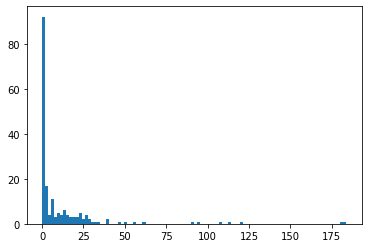

In [16]:
_=plt.hist(closest, bins=100)

In [17]:
df.aw_zip.value_counts()

92408    5
40165    4
85043    4
41048    4
76177    3
        ..
6095     1
23803    1
18045    1
75134    1
7036     1
Name: aw_zip, Length: 127, dtype: int64

In [18]:
df.head()
        

,aw_lat,aw_long,aw_city,aw_state,aw_zip,aw_coord
0,33.433324,-112.207797,Phoenix,Arizona,85043,"(33.43, -112.21)"
1,33.412196,-112.421938,Goodyear,Arizona,85338,"(33.41, -112.42)"
2,33.431192,-112.156569,Phoenix,Arizona,85043,"(33.43, -112.16)"
3,33.448519,-112.221179,Phoenix,Arizona,85043,"(33.45, -112.22)"
4,33.431180,-112.159493,Phoenix,Arizona,85043,"(33.43, -112.16)"


In [19]:
 df['aw_zip_str'] = df['aw_zip'].apply(lambda x: str(x))

In [34]:
df.head(10)

,aw_lat,aw_long,aw_city,aw_state,aw_zip,aw_coord,aw_zip_str
0,33.433324,-112.207797,Phoenix,Arizona,85043,"(33.43, -112.21)",85043
1,33.412196,-112.421938,Goodyear,Arizona,85338,"(33.41, -112.42)",85338
2,33.431192,-112.156569,Phoenix,Arizona,85043,"(33.43, -112.16)",85043
3,33.448519,-112.221179,Phoenix,Arizona,85043,"(33.45, -112.22)",85043
4,33.431180,-112.159493,Phoenix,Arizona,85043,"(33.43, -112.16)",85043
5,33.441742,-112.229580,Tolleson,Arizona,85353,"(33.44, -112.23)",85353
6,34.128411,-117.422592,Rialto,California,92376,"(34.13, -117.42)",92376
7,34.079646,-117.275321,San Bernardino,California,92408,"(34.08, -117.28)",92408
8,37.734826,-121.531485,Tracy,California,95377,"(37.73, -121.53)",95377
9,34.077563,-117.233016,San Bernardino,California,92408,"(34.08, -117.23)",92408


In [57]:
#test
location1 = [1,1,2,4,7,6]
location2 = [3,1,4,10]

In [58]:
closest = []
for location in location1:
    distances = []
    
    for loc in location2:
        
        d = abs(location - loc)
        distances.append(d)
    near = min(distances)
    print(near)
    closest.append(near)
    

closest

0
0
1
0
3
2


[0, 0, 1, 0, 3, 2]

In [23]:
from itertools import combinations
    

### Function to automate feature selection

In [31]:
n_cols= len(df.columns)

In [32]:
n = list(range(n_cols))
k=3
list(combinations(n,k))

[(0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 4, 5),
 (0, 4, 6),
 (0, 5, 6),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 2, 6),
 (1, 3, 4),
 (1, 3, 5),
 (1, 3, 6),
 (1, 4, 5),
 (1, 4, 6),
 (1, 5, 6),
 (2, 3, 4),
 (2, 3, 5),
 (2, 3, 6),
 (2, 4, 5),
 (2, 4, 6),
 (2, 5, 6),
 (3, 4, 5),
 (3, 4, 6),
 (3, 5, 6),
 (4, 5, 6)]

In [25]:
list(df.columns)

['aw_lat',
 'aw_long',
 'aw_city',
 'aw_state',
 'aw_zip',
 'aw_coord',
 'aw_zip_str']

In [27]:
# pip install folium

In [28]:
import folium
from folium.plugins import MarkerCluster

In [29]:
locations = df[['aw_lat', 'aw_long']]
locationlist = locations.values.tolist()
len(locationlist)

184

In [33]:
aw_map = folium.Map(location=[39.83, -98.59], tiles='CartoDB positron', zoom_start=4)

marker_cluster = MarkerCluster().add_to(aw_map)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['aw_zip_str'][point], icon=folium.Icon(color='orange', icon_color='white', angle=0)).add_to(marker_cluster)
aw_map